In [80]:
!pip install kagglehub

  Using cached kagglehub-0.3.4-py3-none-any.whl.metadata (22 kB)
  Using cached tqdm-4.67.0-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.4-py3-none-any.whl (43 kB)
Using cached tqdm-4.67.0-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
## Objective
- This notebook predicts the risk of heart disease using machine learning models trained on health indicator data.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [136]:

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")


#load the dataset
df = pd.read_csv('/Users/macbook/Desktop/Linear_Regression_Model/summative/data/Life Expectancy Data.csv')
columns_to_keep = ["Life expectancy ", "Adult Mortality", "Schooling", "Total expenditure", " BMI "]
df = df[columns_to_keep]
df

,Life expectancy,Adult Mortality,Schooling,Total expenditure,BMI
0,65.0,263.0,10.1,8.16,19.1
1,59.9,271.0,10.0,8.18,18.6
2,59.9,268.0,9.9,8.13,18.1
3,59.5,272.0,9.8,8.52,17.6
4,59.2,275.0,9.5,7.87,17.2
...,...,...,...,...,...
2933,44.3,723.0,9.2,7.13,27.1
2934,44.5,715.0,9.5,6.52,26.7
2935,44.8,73.0,10.0,6.53,26.3
2936,45.3,686.0,9.8,6.16,25.9


In [150]:
# Fill missing values with the mean for each column
df_filled = df.fillna(df.mean())

#separating target variable from the features 
X = df_filled[["Adult Mortality", "Schooling", "Total expenditure", " BMI "]]
y = df_filled["Life expectancy "]
X.shape ,y.shape

((2938, 4), (2938,))

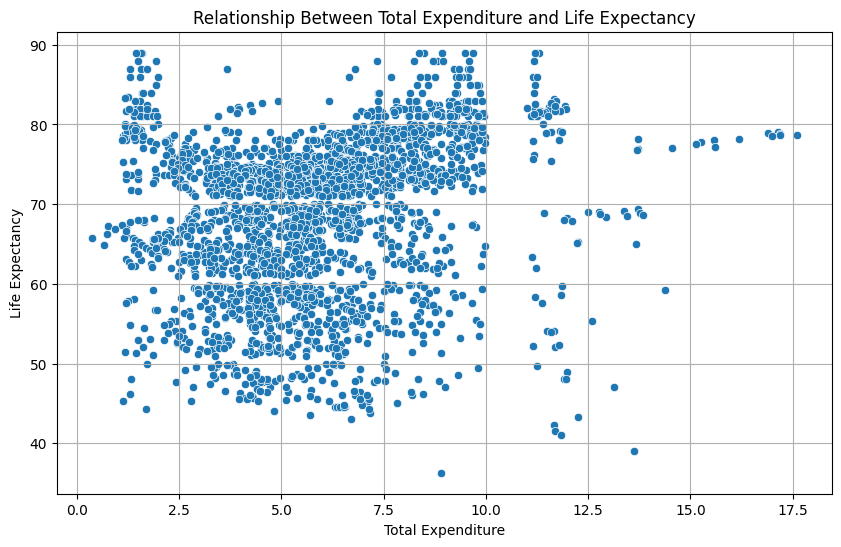

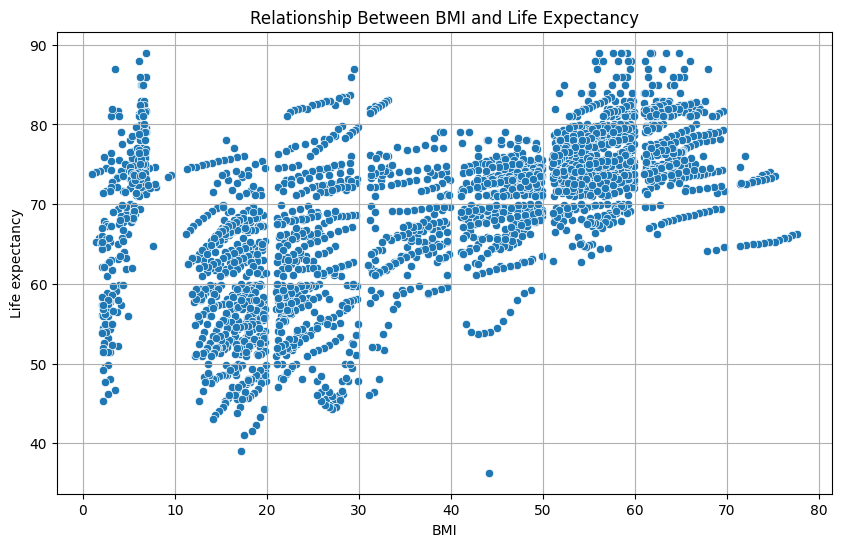

In [162]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total expenditure', y='Life expectancy ')
plt.xlabel('Total Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Relationship Between Total Expenditure and Life Expectancy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' BMI ', y='Life expectancy ')
plt.xlabel('BMI')
plt.ylabel('Life expectancy')
plt.title('Relationship Between BMI and Life Expectancy')
plt.grid(True)
plt.show()


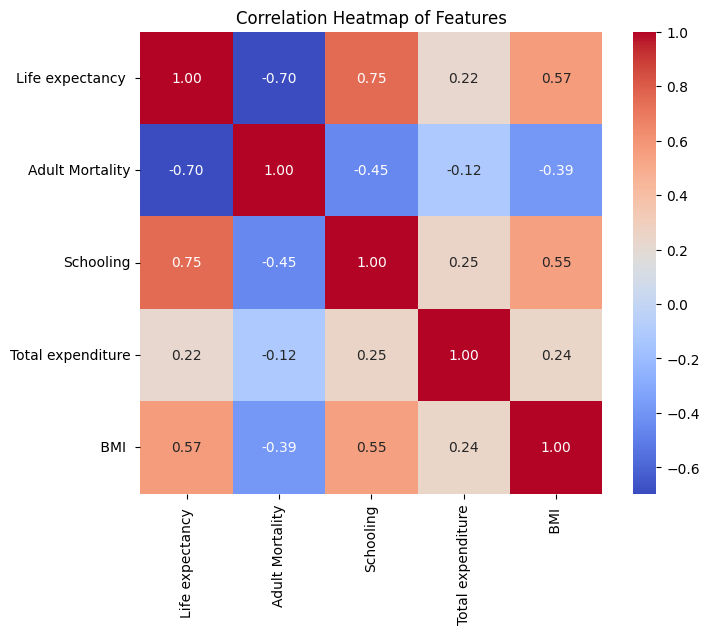

In [152]:
#Heatmap
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()



In [153]:
from sklearn.model_selection import train_test_split

#Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print out the shape of the trained and tested data
print("Training set shape ", X_train.shape, y_train.shape)
print("Testing set shape", X_test.shape, y_test.shape)      

Training set shape  (2350, 4) (2350,)
Testing set shape (588, 4) (588,)


In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
#Creating a linear regression model
lr = LinearRegression()

In [156]:
# Fit the model
lr.fit(X, y)
lr.fit(X_train, y_train)

LinearRegression()

In [183]:
#Predicting on testing test
y_pred_lr = lr.predict(X_test)


In [184]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Evaluate performance of the model
r2 =r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score" , r2)
print("Mean Squared Error" , mse)
print ("Mean Absolute Error" , mae)



R2 Score 0.7227424303984867
Mean Squared Error 24.020286317103363
Mean Absolute Error 3.434985313099806


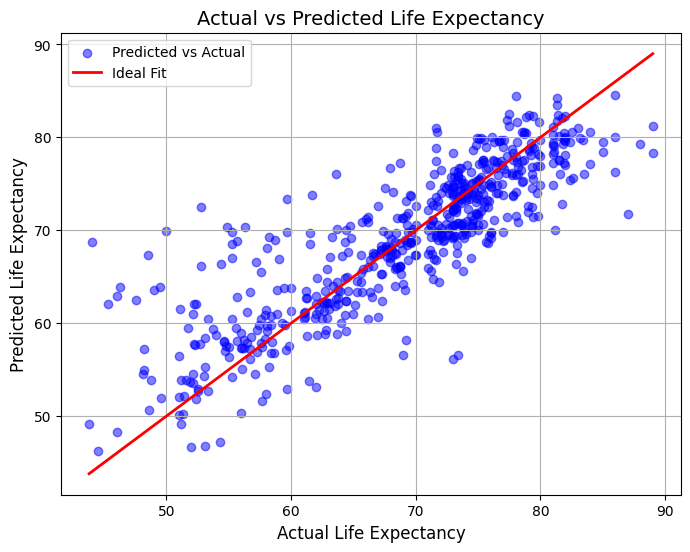

In [185]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')  # Red line for the ideal fit

#labels, title, and legend
plt.xlabel('Actual Life Expectancy', fontsize=12)
plt.ylabel('Predicted Life Expectancy', fontsize=12)
plt.title('Actual vs Predicted Life Expectancy', fontsize=14)
plt.legend()
plt.grid(True)

plt.show()


         

In [187]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

#Creating a Decision Tree Model
dtr = DecisionTreeRegressor()

# Fit the regressor
dtr.fit(X, y)

# Predict values
y_pred_dtr = dtr.predict(X_test)


#Evaluate performance of the model
r2 =r2_score(y_test, y_pred_dtr)
mse = mean_squared_error(y_test, y_pred_dtr)
mae = mean_absolute_error(y_test, y_pred_dtr)

print("R2 Score" , r2)
print("Mean Squared Error" , mse)
print ("Mean Absolute Error" , mae)
#print("Predicted values", y_pred)

R2 Score 0.9999398820720697
Mean Squared Error 0.005208333333333333
Mean Absolute Error 0.002976190476190476


In [190]:
#Random Forest model
from sklearn.ensemble import RandomForestRegressor

#Creating a Random Forest Model
rf = RandomForestRegressor()

# Fit the regressor
rf.fit(X, y)

# Predict values
y_pred_rf = rft.predict(X_test)


#Evaluate performance of the model
r2 =r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

print("R2 Score" , r2)
print("Mean Squared Error" , mse)
print ("Mean Absolute Error" , mae)
#print("Predicted values", y_pred)



R2 Score 0.994224308426099
Mean Squared Error 0.5003786388367283
Mean Absolute Error 0.4693594650291826


In [197]:
# Save the best model
import joblib

# Dictionary to store MSE for each model
model_mse = {}
models = {
    "DecisionTree": dtr,
    "LinearRegression": lr,
    "RandomForest": rf
}

# Populate model_mse with calculated MSE for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred) 
    model_mse[model_name] = mse  # Store the MSE in the dictionary

# Find the model with the lowest MSE
best_model_name, best_mse = min(model_mse.items(), key=lambda item: item[1])
best_model = models[best_model_name]

print(f"The best model is {best_model_name} with a Mean Squared Error of {best_mse:.4f}")

# Save the best model using joblib
joblib.dump(best_model, 'best_model.joblib')
print(f"{best_model_name} saved as 'best_model.joblib'")


The best model is DecisionTree with a Mean Squared Error of 0.0052
DecisionTree saved as 'best_model.joblib'


In [196]:
# Example new data (without column names, in correct order)
new_data_array = np.array([[275.0 ,9.5, 7.87, 17.2]])  # [Adult Mortality, Schooling, Total expenditure, BMI]

# Predict using each model
y_pred_dtr = dtr.predict(new_data_array)  # Decision Tree
y_pred_lr = lr.predict(new_data_array)  # Linear Regression
y_pred_rf = rf.predict(new_data_array)  # Random Forest

# Output the predictions
print(f"Prediction using Decision Tree: {y_pred_dtr[0]:.2f}")
print(f"Prediction using Linear Regression: {y_pred_lr[0]:.2f}")
print(f"Prediction using Random Forest: {y_pred_rf[0]:.2f}")


Prediction using Decision Tree: 59.20
Prediction using Linear Regression: 60.85
Prediction using Random Forest: 60.02


/Users/macbook/Desktop/Linear_Regression_Model/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/macbook/Desktop/Linear_Regression_Model/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/macbook/Desktop/Linear_Regression_Model/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [198]:
def make_prediction(input_data):
    loaded_model = joblib.load('best_model.joblib')
    prediction = loaded_model.predict([input_data])
    return prediction[0]